# 4. 제어흐름

## 4.1 학습내용

### 4.1.1 목표

* 지난 학습 - 변수, 함수
    * 변수
        * 수첩과 같이 저장해서 다시 사용하려는 의도 (재사용)
        * 실제 값을 사용하기 보다는 변수를 사용하는 것이 재사용을 많이 할 수 있게 한다 (일반화 또는 추상화).
            * 조그만 사각형, 큰 사각형을 하나의 함수로 처리하려면 변수를 사용해야 한다.
    * 함수
        * argument(함수를 만들 때)와 parameter (함수를 호출할 때)
        * 지역변수를 돌려주는 경우 return을 사용한다.
    * 함수와 변수
        * 지역변수는 함수부에서만 (들여쓰기 한 부분에서만) 의미가 있다. 함수부를 벗어나면 파괴된다.
        * 전역변수는 어느 곳에서나 사용할 수 있다.
    
* 이번 학습에서는 변수에 따라 프로그래밍의 흐름을 제어하는 조건, 반복을 사용할 수 있게 함.
    * choice 의사결정
    * loop 반복

* 제어흐름은 다이어그램으로 표현하면 이해하기 쉽다. Activity Diagram을 사용한다.

### 4.1.2 문제

* 제어-1 도형 그리기 (반복)
* 제어-2 사용자 입력을 받아서 해당하는 도형을 그리기 (사용자 입력을 if문 처리)
* 제어-3 바람개비 도형 그리기 (if문 사용)
* 제어-4 온도변환 - 단순 if
* 제어-5 성적처리- 다분기
    * 거북이에게 학점묻기
* 제어-6 가위바위보 - 중첩 if
* 제어-7 삼각형 그리기
* 제어-8 BMI
* 제어-9 3,5 배수의 합계 (euler-1)
* 제어-10 윤년인지 맞추기

### 4.1.3 과제

* 제어-11 100년 동안 매 월 1일이 일요일인 경우 (euler-19)
* 제어-12 캘린더 만들기
* 제어-13 숫자 맞추기 게임 (알고리즘)


## 4.2 환경


* plantuml 설정
    * plantuml이 다이어그램을 생성할 때, GRAPHVIZ를 사용한다. 먼저 이 환경을 설정하는 것이 필요하다.
        * 주의
            * 실행파일을 경로로 잡아준다 (폴더가 아니다)
            * 리눅스 실행파일 dot, 윈도우 실행파일 dot.exe
    * ipython notebook에서 사용할 수 있게 plantuml 라이브러리 호출 (명령어는 %install_ext)
    * 명령어 사용할 수 있게 준비 (%load_ext)
    * plantuml.jar 내려받아 저장되었는지 확인
    * 경로의 설정은 참조 "1\_hello_ plantuml.ipynb"
    * 리눅스/맥을 기준으로 설명한다. 윈도우는 디렉토리를 찾아서 넣어주면 된다 (아래 예)

        ```
        import os
        mywd='C:\\Users\\Administrator\\Documents\\jsl\\Code\\p'
        myplantdir=os.path.join(mywd,'lib')
        mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"
        ```

In [2]:
import os
# 작업폴더를 저장해 놓는다.
mywd=%pwd
# 작업폴더 밑 lib폴더 안에 plantuml.jar를 저장한 경우
myplantdir=os.path.join(mywd,'lib')
# 1) 리눅스 /usr/bin/에 dot 실행파일이 있는 경우 별도 설정을 해주지 않아도 된다.
# 리눅스 which명령어 사용해서 dot실행파일이 있는 곳을 알아낸댜.
# 그 결과가 목록이므로, 첫번째 값을 실행파일로 설정해준다.
# 2) 맥 macport를 사용하는 경우, dot경로
# mydotdir='/opt/local/bin/dot'
# 2) 윈도우 -> 환경변수에서 읽어온다.
# mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"
mydotdir=!which dot
mydot=mydotdir[0]
# 2) 윈도우 -> 환경변수에서 가져와서 설정해준다.
# mydot="C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe"


In [3]:
# plantuml.jar파일이 존재하는지 확인한다.
import glob
%cd {myplantdir}
glob.glob(r'./*.jar')

/Users/media/Code/git/p2/lib


['./plantuml.jar']

In [4]:
import os
os.environ['GRAPHVIZ_DOT']=mydot
print os.environ['GRAPHVIZ_DOT']
!java -jar {myplantdir}/plantuml.jar -testdot

/opt/local/bin/dot
The environment variable GRAPHVIZ_DOT has been set to /opt/local/bin/dot
Dot executable is /opt/local/bin/dot
Dot version: dot - graphviz version 2.38.0 (20140413.2041)
Installation seems OK. File generation OK


In [5]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


In [6]:
%load_ext plantuml_magics

## 4.3 제어흐름이란?

* Control Flow 또는 Flow of Control
* 프로그래밍에서 명령문이 실행되는 순서를 제어하는 것.
* 프로그래밍에서는 앞서 있는 명령문이, 뒤에 있는 것보다 먼저 실행된다
    * 순차적 sequential order
* goto 명령문의 문제
    * 프로그램의 흐름을 순차적이지 않게 만든다.
    * goto 명령문은 if-then, while로 변경하도록 한다.
* 조건과 반복을 통한 제어구조
    * 조건 반복은 앞서 배운 변수를 먼저 이해해야 한다.

### 4.3.1 조건

* 조건 choice
* IF, ELSE를 이용해 조건에 따라 실행되는 명령문을 제어한다.
* 종류
    * simple
    ```
    if 조건:
    
    ```

    * multi-way
    ```
    if 조건:
    
    elif 조건:
    
    else:
    ```
    
    * nested
    
    ```
    if 조건:
           if 조건:
           else:
    else:
    ```
    

* logical operator
    * 조건은 항상 True 또는 False 값을 가진다.
    * 복합조건은 논리연산자를 사용하여 표현한다.

* 간단한 simple if문을 사용하면 다음과 같다.
    * if문 조건이 0이면, False가 된다.
    * if문 조건이 0아닌 값을 가지면, True가 된다.

In [3]:
if 1:
    print "This is true."
else:
    print "This is false."

This is true.


In [1]:
if 2:
    print "This is true"

This is true


In [6]:
for i in range(-5,5):
    if i:
        print i, "is true in if-statment"
    else:
        print i, "is false in if-statment"

-5 is true in if-statment
-4 is true in if-statment
-3 is true in if-statment
-2 is true in if-statment
-1 is true in if-statment
0 is false in if-statment
1 is true in if-statment
2 is true in if-statment
3 is true in if-statment
4 is true in if-statment


* 단순 simple if문은 짧게 줄여서 사용할 수 있다. 이를 ternary conditional operator라고 한다.
    * 조건이 참이면 10을 넣고, 아니면 20을 넣는 예를 한 줄로 줄여쓸 수 있다.
    ```
    if condition:
            result=10
    else:
            result=20
    ```


In [9]:
result = 10 if 1 else 20
print result

10


### 4.3.2 반복

* 반복을 사용하려면 시작, 끝, 증감자를 이해해야 한다.
    * 반복되는 명령문을 몇 번 실행할 것인지 결정한다.
    * 몇 번 실행하는지 계수를 사용하여 추적한다.

* 반복 loop - 반복횟수를 정하거나 조건에 따라 명령문의 실행을 반복한다.
    * 반복횟수에 따른 반복 count controlled loop
        * FOR
    * 조건에 따른 반복 condition controlled loop
        * WHILE, DO-WHILE
    * 무한반복 infinite loop
        * 끝내는 경우를 만들어 주지 않으면, 끝낼 수 없는 반복
        ```
        done = "n"
        while done == "n":
                done = input("done? (y/n): ")
        ```
    * 구조
        * simple loop
        ```
        for :
        ```
        
        * nested loop
        ```
        for :
               for :
        ```
        

* x = range(0,5)
    * x는 정수 0,1,2,3,4를 가질 수 있다는 것을 의미한다.
    * 0부터 시작해서 하나씩 증가해서 4까지 증가하는 것이다.
    * for문의 실행에 필요한 시작, 증감자, 끝 조건을 명시하기 편하다.
    

$$ 0 \le x<5, x=정수$$

* 파이프 구조
    * 파이프에 0,1,2,3,4를 순서대로 넣고, 0부터 1개씩 0,1,2,3,4를 꺼내서 사용하는 것으로 이해하면 쉽다.
    * 파이프에서 꺼내 사용한 숫자는 다시 넣지 않고 버린다.


In [1]:
for i in range(0,10):
    print i,

0 1 2 3 4 5 6 7 8 9


### 4.3.3 다이어그램

* 왜 다이어그램을 그릴까?
    * 다이어그램을 그려는 이유는 언어의 문법에서 자유롭게 프로그래밍할 작업을 정하려고 하는 것이다.
    * 다이어그램을 그릴 때는 어떤 절차를, 어떻게 수행해서 작업목적을 완성하는지 생각한다.

* 다이어그램을 그릴 때 주의할 점
    * 컴퓨터가 작업을 수행하도록, 절차를 구체적으로 작성한다.
    * 1부터 10까지 더하는 작업을 예를 들어보자.
        ```
        시작
        1부터 10까지 더한다.
        끝
        ```
        * 1부터 10까지 더하는 작업은 세분화가 필요하다.
    * 2, 4, 8, 7, 5, 3, 1, 6에서 제일 큰 수 7을 찾는 예를 들어보자.
        ```
        시작
        제일 큰 수를 고른다.
        끝
        ```
        * 제일 큰 수를 고르는 방법을 세분화해서 적어야 한다.

* 다이어그램은 제어흐름을 구성하는 (1) 절차, (2) 반복, (3) 조건을 사용한다.

* 절차
    * activity라고 한다.
    * 사용하는 문법은 콜론(:)으로 시작해서 세미콜론(;)으로 끝나고, 그 안에 절차를 적어준다.
    ```
    :activity;
    ```
    
* 반복
    * 시작, 끝, 증감자를 명시해 준다.
    * repeat와 repeat while(반복하는 조건)로 감싸고, 그 안에 activity를 적어준다.
    ```
    repeat
    :activity;
    repeat while(조건)
    ```
    
* 조건
    * 실행하려는 조건을 명시해 준다.
    * 조건명령문으로 감싸고, 그 안에 activity를 적어준다.
    ``` 
    if(조건):
    :activity;
    endif
    ```

* 작업 절차를 다이어그램으로 표현하면 다음과 같다.

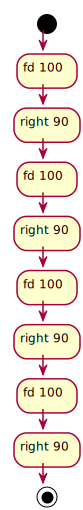

In [7]:
%%plantuml
@startuml
start

:fd 100;
:right 90;
:fd 100;
:right 90;
:fd 100;
:right 90;
:fd 100;
:right 90;
stop
@enduml

* 반복을 사용해서 재구성하면 다음과 같다.

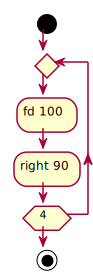

In [8]:
%%plantuml
@startuml
start

repeat
:fd 100;
:right 90;
repeat while(4)

stop
@enduml

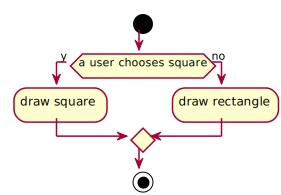

In [14]:
%%plantuml
@startuml
start
if (a user chooses square)then (y)
:draw square;
else (no)
:draw rectangle;
endif
stop
@enduml

## 제어-1: 도형 그리기

* 삼각형, 사각형, 별을 그린다. 각 도형을 그리는 함수로 만든다.
* 도형에 따라 중복되는 명령문이 있는지 살펴본다.
* 함수를 만들 때 생각해 보기.
    * 함수 명을 결정한다. 함수몀은 영어로, 동사+명사로 짓는다.
    * 입력을 결정한다.
        * 인자의 갯수와 숫자인지 문자인지 생각한다.
        * 크기를 인자로 사용하면 여러 크기를 그릴 수 있게 된다.
    * 출력을 결정한다.
        * 갯수와 숫자인지 문자인지 생각한다.
        * 화면에 그리는 경우, 출력인자가 없을 수 있다.
* 절차
    * 다이어그램을 그린다.
    * 중복되는 명령문은 반복문을 사용한다.
    * 다이어그램에 표현된 절차를 하나씩 프로그램으로 구현한다.
* 프로그래밍 요소
    * 반복문을 사용할 수 있다.
    * 중복을 줄이기 위해 함수를 사용하는 것과 반복문을 사용하는 차이를 이해한다.

In [17]:
import turtle
wn=turtle.Screen()
t1=turtle.Turtle()

In [20]:
# 사격형 그리기
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)
t1.forward(50)
t1.right(90)

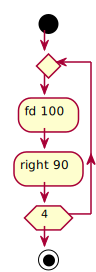

In [35]:
%%plantuml
@startuml
start

repeat
:fd 100;
:right 90;
repeat while(4)

stop
@enduml

In [21]:
t1.home()
t1.clear()

# 반복을 이용
for i in range(0,4):
    t1.forward(100)
    t1.right(90)

* 기계적으로 함수 만들어보기
    * 중복을 찾는다
    * 중복을 묶고 함수명을 준다 -> drawSquare
    * 변경되는 것을 찾는다 -> size 250, 나머지는 변하지 않는다.
    * 인자로 빼준다 -> size 정수

In [22]:
def drawSquare(size):
    for i in range(0,4):
        t1.forward(size)
        t1.right(90)

t1.home()
t1.clear()
drawSquare(100)

In [23]:
# 삼각형 그리기
def drawTriangle(size):
    for i in range(0,3):
        t1.forward(size)
        t1.right(120)

t1.home()
t1.clear()
drawTriangle(120)

In [25]:
def drawSquareAt(size, pos):
    t1.penup()
    t1.setpos(pos)
    t1.pendown()
    for i in range(0,4):
        t1.forward(size)
        t1.right(90)

t1.home()
t1.clear()
drawSquareAt(100,(100,100))

In [11]:
def drawStar(size):
    for i in range(5):
        t1.forward(size)
        t1.right(144)

t1.home()
t1.clear()
drawStar(100)

Appending to ../src/pfun.py


In [33]:
def drawStarFill(size, color):
    angle = 144
    t1.fillcolor(color)
    t1.begin_fill()
    for side in range(5):
        t1.forward(size)
        t1.right(angle)
    t1.end_fill()

t1.home()
t1.clear()
drawStarFill(100, "purple")


## 제어-2: 사용자 입력을 받아서 해당하는 도형을 그리기

* 사용자에게 입력을 받아서, 삼각형 사각형을 그린다.
* 삼각형, 사각형을 따로 그리는 함수를 1개로 묶어서 만든다.
    * 함수를 합치는 경우, 어떤 인자를 추가하는지 생각한다.
    * 삼각형, 사각형이 다르게 그려지는 경우, sides와 angle 값이 다르다는 점에 주목한다.
    * 삼각형, 사각형 함수인자는 size, sides, angle로 한다.
    * 삼각형은 3면, 사각형은 4면을 가진다.
    * 삼각형은 120, 사각형은 90도 회전을 한다.
* 절차
    * 다이어그램을 그린다.
    * 다이어그램에 표현한 절차에 따라 프로그램으로 만들어 본다.

* 프로그래밍 요소:
    * 사용자 입력을 받는다.
    * 변수를 사용한다.
    * 조건문을 사용한다.
    * 다이어그램을 사용한다.


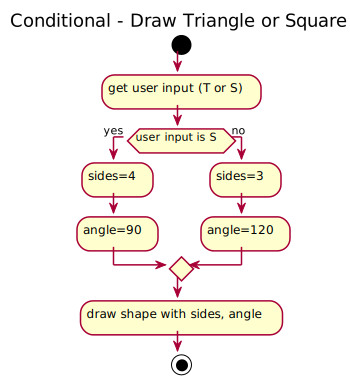

In [36]:
%%plantuml
@startuml

title Conditional - Draw Triangle or Square


start

:get user input (T or S); 

if (user input is S) then (yes)
  :sides=4;
  :angle=90;
else (no)
  :sides=3;
  :angle=120;
endif

:draw shape with sides, angle;

stop

@enduml

* raw_input함수
    * 인자는 문자열
    * 입력 값을 돌려주는 함수
        * 돌려받은 값이 숫자이더라도 연산을 하면 되지 않는 이유를 생각해 본다.
    * 입력값은 sel에 저장된다.

In [21]:
# 사용자 입력받기
sel=raw_input("Triange or Square (T or S): ")
print sel

Triange or Square (T or S): hello
hello


In [ ]:
sel=raw_input("Triange or Square (T or S): ")
size=100
if sel=='T':
    sides=3
    angle=120
elif sel=='S':
    sides=4
    angle=90
for i in range(0,sides):
    t1.forward(size)
    t1.right(angle)

In [ ]:
# polygon
def drawPolygon(size,tilt,sides):
    t1.right(tilt)
    for i in range(0,sides):
        t1.forward(size)
        t1.right(360/sides)

t1.home()
t1.clear()
drawPolygon(100,30,6)
drawPolygon(100,60,4)

In [44]:

def drawSquareOrTriangle(size,sides,angle):
    t1.home()
    t1.clear()
    for i in range(0,sides):
        t1.forward(size)
        t1.right(angle)

sel=raw_input("Triange or Square (T or S): ")
size=100
if sel=='T':
    sides=3
    angle=120
elif sel=='S':
    sides=4
    angle=90
drawSquareOrTriangle(100, sides, angle)

Appending to src/pfun.py


## 제어-3 바람개비 도형 그리기

* 바람개비는 반복을 한다. 반복문 for를 사용한다.
* 경우에 따라서 크기를 키워야 한다. 조건문 if를 사용한다.
* 바람개비 모양
    * 커지는 패턴을 확인한다.
    * 짝수 마다 크기를 늘려주기로 한다.
* 함수
    * makeSwirlSquare(size,bigger,turns,angle)

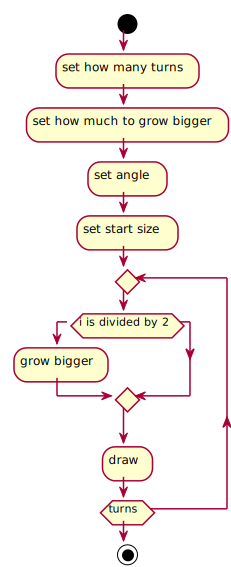

In [39]:
%%plantuml
@startuml
start
:set how many turns;
:set how much to grow bigger;
:set angle;
:set start size;
repeat
if (i is divided by 2) then
    :grow bigger;
endif
:draw;
repeat while(turns)
stop
@enduml

* % 연산자 (modulo)
    * 나머지가 있으면 1
    * 나머지가 없으면 0
* if문과 modulo
    * 나머지가 있으면 TRUE
    * 나머지가 없으면 FALSE
* if 문에 not 연산자를 섞어쓰면 이해하기 어려워진다.

In [14]:
if 6%2:
    print "there is a remainder!"
else:
    print "there is no remainder!"

there is no remainder!


In [15]:
if not 6%2:
    print "there is no remainder!"
else:
    print "there is a remainder!"

there is no remainder!


In [16]:
#for문과 결합해서 해 본다.
x=range(0,10)
for i in x:
    if i%2:
        print i,

1 3 5 7 9


In [21]:
sides=10
size=5
bigger=15
for i in range(0,10):
    if not (i%2):
        size+=bigger
    print i, size

0 20
1 20
2 35
3 35
4 50
5 50
6 65
7 65
8 80
9 80


In [23]:
turns=20
angle=90
size=5
bigger=15
t1.home()
t1.clear()
for i in range(0,turns):
    if not (i%2):
        size+=bigger
    t1.forward(size)
    t1.right(angle)

In [22]:
def makeSwirlSquare(size,bigger,turns,angle):
    nBigger=2
    for i in range(0,turns):
        #if divided by nBigger, make it bigger
        if not i%nBigger:
            size+=bigger
        t1.forward(size)
        t1.right(angle)

turns=20
size=5
bigger=15
angle=90
t1.home()
t1.clear()
makeSwirlSquare(size,bigger,turns,angle)

Appending to pfun.py


## 제어-4: 온도를 입력받아서 F-C 변환

* 프로그래밍 요소
    * 다분기 if-elseif를 이해한다.
    * 사용자 입력을 이해한다.
    * 데이터형 (문자열, 정수, 소수)을 이해한다.
    * 화면출력을 이해한다.

* 앞서 배운 변수를 이해하고, 사용자에게서 받은 변수에 따라 프로그램의 반응이 달라진다.

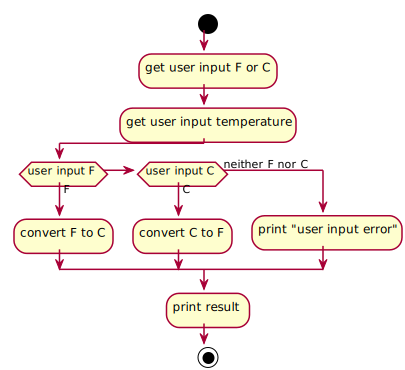

In [6]:
%%plantuml
@startuml
start
:get user input F or C;
:get user input temperature;
if (user input F) then (F)
    :convert F to C;
elseif(user input C) then(C)
    :convert C to F;
else(neither F nor C)
:print "user input error";
endif
:print result;
stophttp://localhost:8888/notebooks/4_5_controlstructure.ipynb#
@enduml

### 변수의 이해

* 변수는 메모리에 저장된 값에 대한 명칭이다.
* 변수를 저장하는 이유는, 다시 사용하려고 하기 때문이다.

### 사용자에게서 입력 받기

* 사용자에게 입력을 받는 것은 컴퓨터에게서 받는 것보다 어렵다.
    * 사용자는 예상하지 못한 입력을 넣는 경우가 있기 때문에 오류를 확인하는 것이 필수적이다.
        * 숫자를 넣으라고 하면, 문자를 넣거나
        * 문자만을 넣으라고 하면, 특수문자를 넣거나
* input
    * 사용자 입력 값을 받아서 파이썬 명령어로 실행.
    * eval(raw_input(prompt))와 동일한 의미. 사용자에게 입력을 받아서 파이썬 명령어로 실행한다는 의미.
    * 수를 입력할 경우에는 그냥, 문자는 따옴표
    * 사용자가 입력을 잘 못하면 오류가 남
* raw_input
    * 사용자 입력 값을 받아서 문자열로 그 값을 돌려줌.
* 2+1을 입력하면 input은 연산을 해서 그 결과 3을, 그러나 raw_input은 연산을 하지 않고 '2+1'을 문자열로 돌려줌.

In [41]:
cmd =input("입력하세요: ")
print cmd
sel = raw_input('입력을 고르세요:')
print sel

입력하세요: 1+2
3
입력을 고르세요:1+2
1+2


### 화면출력 값의 이해
* print "%d", 12.3는 정수로 형변환을 해서 출력을 하므로 12.
* print "%s", 12.3는 문자열로 형변환을 해서 출력하므로 숫자가 아닌 문자열 12.3.
* print "%.2f", 12.3는 소수점 2자리로 출력을 하므로 12.30.
* 파이썬 2.6부터는 .format이란 명령어 지원
    * {0:d} 0번째 입력 값을 정수로 출력
    * {1:s} 1번째 입력 값을 문자열로 출력
    * {2:.2f} 2번째 입력 값을 소수점 2자리로 출력
    * 단 입력 값의 데이터형이 맞지 않을 경우 오류가 발생하므로, 형변환을 해주어야 함.

* 플러스 '+' 연산자가 문자열을 만나면 더하기를 하지 않고, 문자열을 서로 붙이는 것을 opeator overloading이라고 한다.
    * "Hello "+"Seoul"

In [7]:
city="seoul"
print city
hello="Hello " + city
print hello
print "Hello %s is beautiful" % city
# formatted print
# 12.3을 정수 형식으로 출력
print "%d" % 12.3
# 12.3을 문자열 형식으로 출력
print "%s" % 12.3
print "%.2f" % 12.3
print "첫 번째 {0:d} 두 번째 {1:s} 세 번째 {2:.2f}".format(int(12.3),str(12.3),12.3)

seoul
Hello seoul
Hello seoul is beautiful
12
12.3
12.30
첫 번째 12 두 번째 12.3 세 번째 12.30


In [5]:
sel = raw_input('입력하세요 (F 또는 C): ')
temp = raw_input('온도를 입력하세요: ')
print "선택한 값은: ",sel
print "입력한 온도는: %s" % temp

입력하세요 (F 또는 C): F
온도를 입력하세요: 10
선택한 값은:  F
입력한 온도는: 10


In [31]:
sel = raw_input('입력하세요 (F 또는 C):')
temp = raw_input('온도를 입력하세요:')
temperature = int(temp)
if sel=='F':
    res=(temperature-32)*5/9.0
elif sel=='C':
    res=temperature*9.0/5.0+32
else:
    print "선택은 F또는 C이어야 합니다."
print "{0:d}{1:s}를 변환하면 {2:.2f}입니다".format(temperature,sel,res)

입력하세요 (F 또는 C):F
온도를 입력하세요:50
50F를 변환하면 10.00입니다


### 함수로 변환

* 함수의 입력 값, 출력 값을 정의해 줌. 입력 변수명, 출력 변수명이 반드시 같을 필요가 없슴.
* 함수를 사용하면 재사용할 수 있게 된다.
* 아래에서 res를 미리 선언하여, 초기화하는 것이 좋음.
    * 파이썬은 변수의 선언이 별도로 필요하지 않은 언어이지만 다른 언어에서는 그렇게 함.
    * 초기화한다는 것은 데이터형에 맞는 바이트만큼의 크기를 할당한다는 의미.

In [26]:
sel = raw_input('Enter F or C: ')
temp = raw_input('Enter temperature: ')
temperature = int(temp)

def convertTemperature(sel,temperature):
    res=0.0
    if sel=='F':
        res=(temperature-32)*5/9.0
    elif sel=='C':
        res=temperature*9.0/5.0+32
    else:
        print "Error: Enter either F or C!"
    print "{0:d}{1:s} --> {2:.2f}".format(temperature,sel,res)
    return res

result=convertTemperature(sel,temperature)
print "{0:d}{1:s} --> {2:.2f}".format(temperature,sel,result)

Enter F or C: F
Enter temperature: 100
100F --> 37.78
100F --> 37.78


### 고려할 점
* 대소문자입력 - 사용자가 소문자 f c를 입력하는 경우
* 연산할 경우 소수점 처리: 정수끼리 나누면 출력 값은 정수
* 연산의 우선순위
* 결과 값이 섭씨(C)인지 화씨(F)인지 표시.

## 제어-5: 성적을 입력받아 A~F 학점 처리

* 문제 1-2 온도변환 참조
* 프로그래밍 요소
    * 다분기 조건을 사용한다.
    * 사용자 입력을 받는다 (0~100점 점수)
    * 사용자 입력 값을 연산하려면 소수로 받는다.
    * 값을 형식에 맞추어 출력한다.
* 함수
    * def computeGrade(marks)

* 다분기 다이어그램 형식

In [ ]:
%%plantuml
@startuml
start

:get user input marks;
if()
elseif()
elseif()
elseif()
elseif()
endif
:print grade;
stop
@enduml

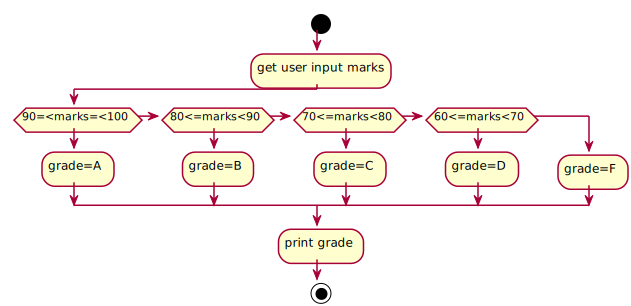

In [7]:
%%plantuml
@startuml
start
:get user input marks;
if (90=<marks=<100)
    :grade=A;
elseif(80<=marks<90)
    :grade=B;
elseif(70<=marks<80)
    :grade=C;
elseif(60<=marks<70)
    :grade=D;
else
    :grade=F;
endif
    :print grade;
stop
@enduml

### 입력 값의 처리

* 사용자 입력 값: 앞의 예는 정수로 변환. 점수는 소수점으로 변환.
* if문은 다분기, 구간별 조건.
* 사용자 입력이 100점 이상, 0점 이하인 경우는 else문에서 처리.
* 사용자 입력이 문자, 특수문자를 포함할 경우 처리하지 않고 있슴.

In [4]:
marksTmp = raw_input('성적을 입력하세요 (0~100):')
marks = float(marksTmp)
print "입력 값은: ",marks

성적을 입력하세요 (0~100):66
입력 값은:  66.0


* if문의 조건은 연속적인 값이다.
* 연속적이지 않은 값을 비교하는 경우 (과일 또는 나라를 비교하는 경우)
* 연속적인 값을 비교할 경우에는 범위를 사용하지만
* 비연속적인 값을 사용하는 경우에는 하나씩 비교한다.
    * Python은 switch문이 없다.


In [ ]:
if(90<=marks<=100):
    print "grade is A"

In [8]:
marksTmp = raw_input('성적을 입력하세요 (0~100):')
marks = float(marksTmp)
if marks>=90 and marks<=100:
    grade='A'
elif marks>=80 and marks<90:
    grade='B'
elif marks>=70 and marks<80:
    grade='C'
elif marks>=60 and marks<70:
    grade='D'
else:
    grade='F'
print "입력한 점수는 {0:.1f} 학점은 {1:2s}".format(marks,grade)

성적을 입력하세요 (0~100):76
입력한 점수는 76.0 학점은 C 


### 함수로 변환

* 함수의 입력은 marks, 출력은 grade.
* 사용자 입력 값에 특수문자가 섞이면 정규식regexp로 처리 가능.

In [30]:
marksTmp = raw_input('Enter marks (0~100): ')
marks = float(marksTmp)
def computeGrade(marks):
    if marks>=90 and marks<=100:
        grade='A'
    elif marks>=80 and marks<90:
        grade='B'
    elif marks>=70 and marks<80:
        grade='C'
    elif marks>=60 and marks<70:
        grade='D'
    else:
        grade='F'
    print "You enterd marks {0:.1f} --> grade {1:2s}".format(marks,grade)
    return grade

grade=computeGrade(marks)
print "You enterd marks {0:.1f} --> grade {1:2s}".format(marks,grade)

Enter marks (0~100): 100
You enterd marks 100.0 --> grade A 
You enterd marks 100.0 --> grade A 


## 제어-6: 가위바위보

* 가위, 바위, 보 게임을 만든다.
    * 모든 경우의 수는 3 x 3으로 조합된 9가지이다.
    * 경우의 수에는 중복되는 조합이 있다.
* 프로그래밍 요소
    * nested if
    * nested if문은 복합조건으로 만들 수 있다.
* input은 2개 output은 1개
    def rspPlay(u1, u2):

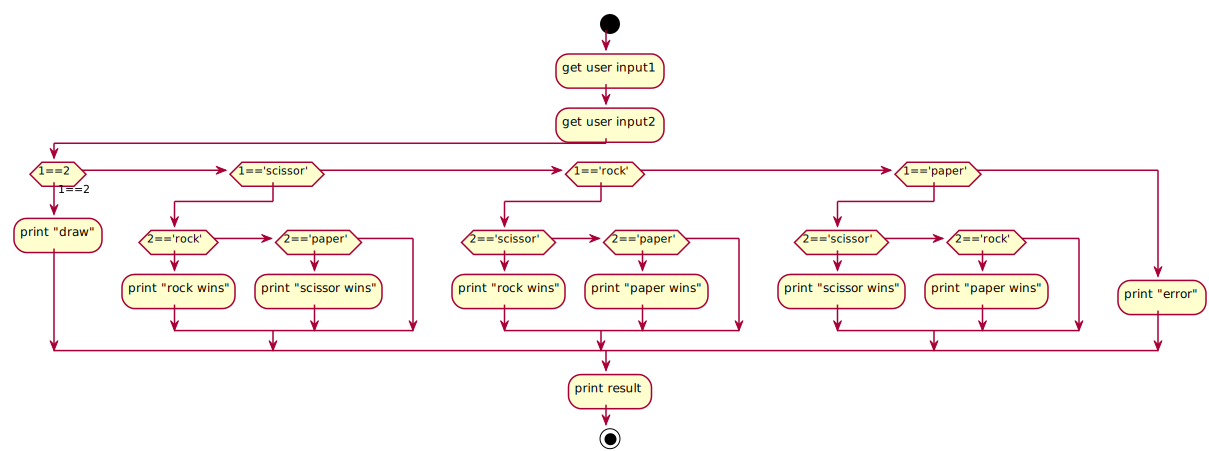

In [8]:
%%plantuml
@startuml
start
:get user input1;
:get user input2;
if (1==2) then (1==2)
    :print "draw";
elseif(1=='scissor')
    if (2=='rock')
        :print "rock wins";
    elseif(2=='paper')
        :print "scissor wins";
    endif
elseif(1=='rock')
    if (2=='scissor')
        :print "rock wins";
    elseif(2=='paper')
        :print "paper wins";
    endif
elseif(1=='paper')
    if (2=='scissor')
        :print "scissor wins";
    elseif(2=='rock')
        :print "paper wins";
    endif
else
    :print "error";
endif
:print result;
stop
@enduml

* 단계별로 함수를 이해해 보기
    * 복합조건을 사용한다.
    * return을 이해한다.
    * return 값을 받는 것을 이해한다.
    * 함수의 입력을 이해한다. 변하는 값을 밖으로 빼준다.
    * 함수를 호출할 때는 값으로 한다 (parameter)

In [2]:
sel1=raw_input("enter s,r or p")
sel2=raw_input("enter s,r or p")

enter s,r or ps
enter s,r or pp


In [4]:
if sel1=="s":
    if sel2=="r":
        print "sel2 won"
    elif sel2=="p":
        print "sel1 won"

sel1 won


* 복합조건을 사용

In [5]:
if sel1=="s" and sel2=="r":
    print "sel2 won"
elif sel1=="s" and sel2=="p":
    print "sel1 won"

sel1 won


* 왜 None이 출력될까?
* 함수의 출력이 없으면 print 출력을 할 수 없다 -> None

In [6]:
def rspPlay():
    if sel1=="s" and sel2=="r":
        res= "sel2 won"
    elif sel1=="s" and sel2=="p":
        res= "sel1 won"
    print res

print rspPlay()

sel1 won
None


In [7]:
def rspPlay():
    if sel1=="s" and sel2=="r":
        res= "sel2 won"
    elif sel1=="s" and sel2=="p":
        res= "sel1 won"
    return res

print rspPlay()

sel1 won


In [ ]:
def rspPlay(sel1,sel2):
    if sel1=="s" and sel2=="r":
        res= "sel2 won"
    elif sel1=="s" and sel2=="p":
        res= "sel1 won"
    return res

result=rspPlay("s","p")
print result

### 한글을 비교하기

* 한글은 유니코드unicde.
* 지원: ipython notebook에서는 유니코드 지원. 다른 환경에서나, 파일을 읽어오는 경우 유니코드 별도 설정 필요.

In [2]:
if '가위'=='가위':
    print '서로 비긴 거 알지?!'

서로 비긴 거 알지?!


In [31]:
sel1 = raw_input("첫 번쨰 가위, 바위, 보 가운데 하나를 내세요: ")
sel2 = raw_input("두 번째 가위, 바위, 보 가운데 하나를 내세요: ")

def rspPlayHangul(u1, u2):
    if u1 == u2:
        res="비겼습니다."
    elif u1 == '가위':
        if u2 == '바위':
            res="바위가 이겼습니다."
        else:
            res="가위가 이겼습니다."
    elif u1 == '바위':
        if u2 == '보':
            res="보가 이겼습니다."
        else:
            res="바위가 이겼습니다."
    elif u1 == '보':
        if u2 == '바위':
            res="보가 이겼습니다."
        else:
            res="가위가 이겼습니다."
    else:
        res="오류! 가위, 바위, 보 가운데 고르세요!"
    return res

print(rspPlayHangul(sel1, sel2))

Appending to pfun.py


In [ ]:
sel1 = raw_input("You select scissor, rock or paper: ")
sel2 = raw_input("(S)he selects scissor, rock or paper: ")

def rspPlay(u1, u2):
    if u1 == u2:
        res="draw"
    elif u1 == 'scissor':
        if u2 == 'rock':
            res="rock won."
        else:
            res="scissor won."
    elif u1 == 'rock':
        if u2 == 'paper':
            res="paper won."
        else:
            res="rock won."
    elif u1 == 'paper':
        if u2 == 'rock':
            res="paper won."
        else:
            res="scissor won."
    else:
        res="Error: select one of scissor, rock or paper!"
    return res

print(rspPlay(sel1, sel2))

In [ ]:
# 조건에 논리연산자를 사용
def rspPlayV1(u1, u2):
    if u1 == u2:
        res="draw"
    elif u1 == 'scissor' and u2 == 'rock':
        res="rock won."
    elif u1 == 'scissor' and u2 == 'paper':
        res="scissor won."
    elif u1 == 'rock' and  u2 == 'paper':
        res="paper won."
    elif u1 == 'rock' and  u2 == 'scissor':
        res="rock won."
    elif u1 == 'paper' and u2 == 'rock':
        res="paper won."
    elif u1 == 'paper' and u2 == 'scissor':
        res="scissor won."
    else:
        res="Error: select one of scissor, rock or paper!"
    return res


## 제어-7: 삼각형 그리기

* 문자로 삼각형 도형을 그린다.1 ~ 11개
* 프로그래밍 요소
    * 문자열 합성을 사용할 수 있다.
    * 문자로 도형을 그릴 때, 프로그래밍으로 문자의 반복을 할 수 있다.
    * 반복회수를 제어할 수 있다.
    * range()의 시작, 끝을 이해할 수 있다.


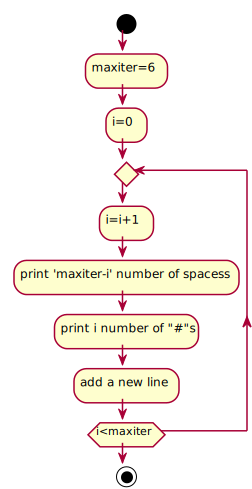

In [9]:
%%plantuml
@startuml
start
:maxiter=6;
:i=0;
repeat
:i=i+1;
:print 'maxiter-i' number of spacess;
:print i number of "#"s;
:add a new line;
repeat while(i<maxiter)
stop
@enduml

### 상수의 사용

* 프로그램의 재사용을 향상.
* 반복문으로 문제를를 풀려면 2가지를 이해해야 한다.
    * 증감자
    * operator overloading

In [2]:
print 1+1
print '1'+'1'
print 1*2
print '1'*2
print '1'*10

2
11
2
11
1111111111


In [1]:
# 1,2,3,4,5만 변경된다는 패턴을 알 수 있다.
print "#"*1
print "#"*2
print "#"*3
print "#"*4
print "#"*5

#
##
###
####
#####


In [1]:
for i in range(1,6):
    print "*"*i

*
**
***
****
*****


In [3]:
print "     "+"#"
print "    "+"##"
print "   "+"###"
print "  "+"####"
print " "+"#####"

     #
    ##
   ###
  ####
 #####


In [4]:
print " "*5+"#"*1
print " "*4+"#"*2
print " "*3+"#"*3
print " "*2+"#"*4
print " "*1+"#"*5

     #
    ##
   ###
  ####
 #####


In [12]:
for i in range(1,6):
    print((5-i)*" "+i*"#")

    #
   ##
  ###
 ####
#####


In [11]:
for i in range(1,6):
    print((5-i)*" "+2*i*"#")

    ##
   ####
  ######
 ########
##########


In [11]:
maxiter=5
for i in range(1,maxiter+1):
    print((maxiter-i)*" "+2*i*"#")

    #
   ##
  ###
 ####
#####


In [ ]:
nMax=6
for i in range(1,nMax):
    print ' '*(nMax-i)+"*"*i

### 함수로 만들 경우

* 출력 값이 없는 경우 return이 없다.
* void 함수.
* 맨 위 1개 - 10개

In [36]:
def drawTriangleWithChar(nTimes,symbol):
    maxTimes=nTimes
    for i in range(1,maxTimes+1):
        print((maxTimes-i)*" "+2*i*symbol)

drawTriangleWithChar(8,'#')

       ##
      ####
     ######
    ########
   ##########
  ############
 ##############
################


## 제어-8: BMI

* 사용자의 몸무게를 입력받아서, BMI를 계산한다.
* 프로그래밍 요소
    * 다분기 조건을 사용할 수 있다.
    * 조건에 논리연산자를 사용할 수 있다.
    * 범위 조건과 값 조건의 차이를 이해할 수 있다.
    * 소수점 처리에 유의. 정수끼리의 연산은 정수.
computeBMI(height,weight) -> bmi


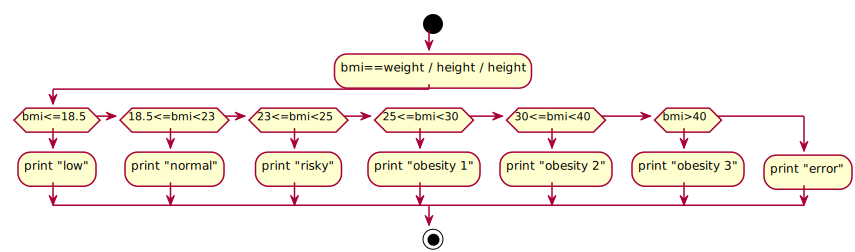

In [10]:
%%plantuml
@startuml
start
:bmi==weight / height / height;
if(bmi<=18.5)
  :print "low";
elseif(18.5<=bmi<23)
  :print "normal";
elseif(23<=bmi<25)
  :print "risky";
elseif(25<=bmi<30)
  :print "obesity 1";
elseif(30<=bmi<40)
  :print "obesity 2";
elseif(bmi>40)
  :print "obesity 3";
else
  :print "error";
endif
stop
@enduml

In [12]:
# 170cm 75kg
weight=75
height=1.7
bmi=float(weight/ (height * height))
print bmi

25.9515570934


* 연속값을 정의할 때 주의

In [ ]:
bmi=24.99
if bmi >= 18.5 and bmi<=24.9:
    print "normal weight"
elif bmi >= 25 and bmi<=29.9:
    print "overweight"  

In [11]:
height=1.74
weight=69
bmi = float(weight /( height * height) )
print 'Your BMI is %.2f' % bmi
if bmi <= 18.5:
    print '저체중'
elif bmi >= 18.5 and bmi < 23:
    print '정상체중'
elif bmi >= 23 and bmi < 25:
    print '위험체중'
elif bmi >= 25 and bmi < 30:
    print "비만 1단계"
elif bmi >= 30 and bmi < 40:
    print "비만 2단계"
elif bmi >= 40:
    print "비만 3단계"
else:
    print "오류"

Your BMI is 22.79
정상체중


### 함수로 만들 경우

* 키, 몸무게를 함수의 패러미터로 설계. 결합성의 최소화.
* 패러미터(매개변수)와 아규먼트(실인수)를 구분. 후자는 실제로 넘겨주는 인자 값. 
* 문자열을 return하여 출력할 수 있슴.

In [5]:
height=1.74
weight=69
def computeBMI(height,weight):
    bmi = float(weight / height / height)
    print 'Your BMI is %.2f' % bmi
    if bmi <= 18.5:
        res = '저체중'
    elif bmi >= 18.5 and bmi < 23:
        res = '정상체중'
    elif bmi >= 23 and bmi < 25:
        res = '위험체중'
    elif bmi >= 25 and bmi < 30:
        res = "비만 1단계"
    elif bmi >= 30 and bmi < 40:
        res = "비만 2단계"
    elif bmi >= 40:
        res = "비만 3단계"
    else:
        res = "오류"
    return res
print computeBMI(height,weight)

Your BMI is 22.79
정상체중


In [39]:
height=1.74
weight=69
def computeBMI(height,weight):
    bmi = float(weight / height / height)
    print 'Your BMI is %.2f' % bmi
    if bmi <= 18.5:
        res = 'Underweight'
    elif bmi >= 18.5 and bmi < 23:
        res = 'Normal weight'
    elif bmi >= 23 and bmi < 25:
        res = 'Risk of overweight'
    elif bmi >= 25 and bmi < 30:
        res = "Obese Stage 1"
    elif bmi >= 30 and bmi < 40:
        res = "Obese Stage 2"
    elif bmi >= 40:
        res = "Obese Stage 3"
    else:
        res = "Error"
    return res
print computeBMI(height,weight)

Your BMI is 22.79
Normal weight


## 제어-9: 3, 5배수의 합계

* 1000이하의 수 가운데 3, 5배수의 합계를 구한다.
    * 수학, 컴퓨터 문제를 제공하는 사이트 참조 https://projecteuler.net
    * 1번 문제
        * If we list all the natural numbers below 10 that are multiples of 3 or 5,
        we get 3, 5, 6 and 9. The sum of these multiples is 23.
        * Find the sum of all the multiples of 3 or 5 below 1000.

* 프로그래밍 요소
    * if문과 for문을 같이 사용.
    * 건너 뛰는 반복문을 사용할 수 있다.
    * 모듈로 연산자를 사용할 수 있다.
    * 조건문에 not 연산자를 사용할 수 있다.


* 프로그래밍으로 생각해보기
    * 먼저 입력과 출력을 정한다.
        * 입력 1~1000
        * 출력 3,5 배수의 합계
    * 작업절차
        * 하나씩 숫자를 가져오기
        * 그 숫자가 배수인지 아닌지 판별하기
        * 배수이면 합계를 구하기
        * 합계가 끝나면, 출력하기기

* 위 작업절차는 1000번 반복이 되어야 한다.
* 우선 작업을 1회만 완성한 후, 다음 반복을 넣어서 생각하는 것이 쉽다.
* 1회만 완성해보자
    * 숫자 1개를 가져오기
        ```
        :get a number;
        ```
    * 그 숫자가 배수인지 판별하기
        ```
        the number is divided by 3 or 5
        ```
    * 배수이면 합계를 구하기 - 여기서 합계는 처음에 아무런 값도 가지지 않도록 0으로 초기화한다.
        ```
        if (num is not divided by 3 or 5) then (true)
        :add num to sum;
        endif
        ```
    * 합계가 끝나면, 출력하기
        ```
        print sum
        ```


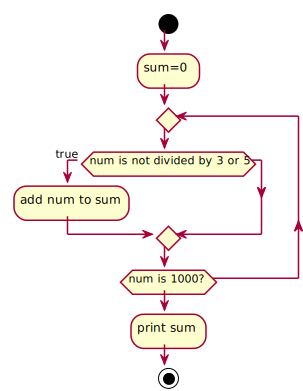

In [14]:
%%plantuml figure1
@startuml

start

:sum=0;
repeat
    if (num is not divided by 3 or 5) then (true)
    :add num to sum;
    endif
repeat while (0 < num < 1000)
:print sum;

stop

@enduml

* 다이어그램을 그려서 작업절차가 정해지면, 프로그램으로 옮겨보자.
* 1회만 완성하기로 하고, 처음 가져오는 숫자는 3이라고 임의로 정해보자.
    * modulo를 사용할 때는 나머지 값을 반환한다는 것과
    * 조건문에서 나머지 값이 0인 경우는 false로 처리된다는 점에 주의하자

In [3]:
i=3
if i%3:
    print i
else:
    print "else!"

else!


In [4]:
if 0:
    print "0"
else:
    print "else!"

else!


In [5]:
if 1:
    print "1"
else:
    print "else!"

1


In [6]:
if not 0:
    print "not 0"
else:
    print "else!"

not 0


In [8]:
i=3
if i%3==0:
    print "0 -> no remains"
else:
    print "else"

0 -> no remains


In [10]:
i=3
if i%3!=0:
    print "0 -> no remains"
else:
    print "else"

else


In [11]:
i=3
if not i%3:
    print "0 -> no remains"
else:
    print "else"

0 -> no remains


In [12]:
i=3
sum=0
if i%3==0:
    print "0"
    sum=sum+i
else:
    print "else"
print sum

0
3


* 1회가 완성이 되었으면 반복을 넣어본다.

In [13]:
i=3
sum=0
for i in range(0,10):
    if i%3==0 or i%5==0:
        sum=sum+i
print sum

23


In [42]:
def pEuler1():
    sum=0
    for num in range(0,1000,3):
        if not (num % 3 and num % 5): sum+=num
    return sum

answer=pEuler1()
print "sum of 3,5 multiples =",answer

sum of 3,5 multiples = 166833


## 제어-10: 윤년인지 맞추기

* 연도를 입력하여 윤년인지 맞추는 프로그램 작성
* 윤년은 2월에 29일 있는 해. 그 조건은
    * 4로 나누어지면서 100으로 나누어지지 않거나
    * 4로 나누어지면서 400으로 나누어짐
* 프로그래밍 요소
    * 복합조건을 사용할 수 있다.
    * 모듈로를 사용할 수 있다.


In [ ]:
year = int(raw_input("Enter a year: "))
if (year % 4) == 0:
   if (year % 100) == 0:
       if (year % 400) == 0:
           print("{0} is a leap year".format(year))
       else:
           print("{0} is not a leap year".format(year))
   else:
       print("{0} is a leap year".format(year))
else:
   print("{0} is not a leap year".format(year))

In [ ]:
year=1800
if (year%4 == 0) and (year%100 !=0 or year%400==0):
    print '{0}는 윤년입니다.'.format(year)
else:
    print '{0}는 윤년이 아닙니다.'.format(year)

In [15]:
years=[1800,1900,1912,1984,1985,2000,2015,1825,1928,2031,1845,1947,2053,2099]
for year in years:
    if (year%4 == 0) and (year%100 !=0 or year%400==0):
        print '{0}는 윤년입니다.'.format(year)
    else:
        print '{0}는 윤년이 아닙니다.'.format(year)

1800는 윤년이 아닙니다.
1900는 윤년이 아닙니다.
1912는 윤년입니다.
1984는 윤년입니다.
1985는 윤년이 아닙니다.
2000는 윤년입니다.
2015는 윤년이 아닙니다.
1825는 윤년이 아닙니다.
1928는 윤년입니다.
2031는 윤년이 아닙니다.
1845는 윤년이 아닙니다.
1947는 윤년이 아닙니다.
2053는 윤년이 아닙니다.
2099는 윤년이 아닙니다.


## 제어-11: 100년 동안 매 월 1일이 일요일인 경우

* 출처 euler 19
* 20c 100년 동안 (1901년 1월 1일 ~ 2000년 12월 31일) 매 월 첫 날이 일요일인 경우가 몇 일
    * 1 Jan 1900 was a Monday.
    * 30일 -> September,April, June and November.
    * 31일 -> 나머지 월
    * 윤년 아닌 경우 28, 윤년에는 29일 -> 2월
    * 윤년은 evenly divisible by 4, but not on a century unless it is divisible by 400.
* 윤년은 다음 문제 참조
* 프로그래밍 요소
    * 복잡한 조건, 반복을 사용할 수 있다.
    * 1~12월 일수를 저장하여 사용하려면 구조를 사용해야 한다 (다음 장에서 배움).

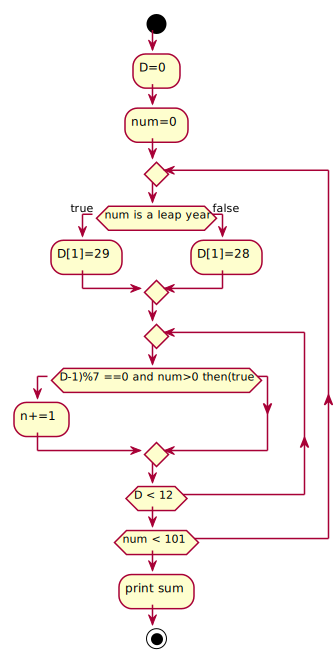

In [14]:
%%plantuml figure1
@startuml

start

:D=0;
:num=0;
repeat
    if (num is a leap year) then (true)
    :D[1]=29;
    else (false)
    :D[1]=28;
    endif
    repeat
    if (D-1)%7 ==0 and num>0 then(true)
    :n+=1;
    endif
    repeat while(D < 12)
repeat while (num < 101)
:print sum;
stop

@enduml

In [8]:
def dayListBuild():
    dayListBuild = [[0,0,0]]
    for year in range(1900, 2001):
        for month in range(1, 13):
            if month in [4, 6, 9, 11]:
                dayRange = 30
            elif not month - 2: #if minus 2 is equal to 0 (=Feb.)
                if year % 4 and (not year % 100 or year % 400):
                        dayRange = 29
                else:
                    dayRange = 28
            else:
                dayRange = 31
            for day in range(1, dayRange + 1):
                dayListBuild.append([year, month, day])
    return dayListBuild

def sundayList():
    dayList = dayListBuild()
    sundayList = []
    for day in range(len(dayList)):
        if not (day - 6) % 7 and dayList[day][0] > 1900 and not dayList[day][2] - 1:
            sundayList.append(dayList[day])
    return len(sundayList)

print(sundayList())

200


In [5]:
def pEuler_19():
    D=[31,28,31,
       30,31,30,
       31,31,30,
       31,30,31]
    d,n=0,0
    for i in range(0,10):
        print "year {0}".format(i)
        if (not (1900+i)%4 and (1900+i)%100) or not (1900+i)%400:
            D[1]=29
        else:
            D[1]=28
        for t in D:
            if not (d-1)%7 and i>=1:
                print "\tMonth:{0} d:{1}".format(t,d)
                n+=1
            d+=t
            #print n, t, d,not(d-1)%7
    return n

n=pEuler_19()
print "p euler 19 =", n

year 0
year 1
	Month:31 d:365
	Month:31 d:638
year 2
	Month:30 d:820
	Month:31 d:911
year 3
	Month:30 d:1338
	Month:31 d:1429
year 4
	Month:31 d:1520
	Month:30 d:1765
year 5
	Month:31 d:2038
year 6
	Month:31 d:2311
year 7
	Month:31 d:2556
	Month:31 d:2829
year 8
	Month:30 d:3165
	Month:31 d:3256
year 9
	Month:30 d:3438
p euler 19 = 15


## 제어-12: 업다운 게임

* 사용자가 범위를 정하고, 생각하는 값을 입력한다.
* 컴퓨터는 그 숫자를 맞춘다.
* 범위 + 1를 2의 승수로 변환해서, 그 승수가 맞추는 최대횟수가 된다.
    * 15 + 1 = 16이고
    * 16은 $2^4$이므로, 최대 4회 이내에서 숫자를 맞출 수 있다.
        ```
        1 would take 1
        3 would take 2
        7 would take 3
        15 would take 4
        31 would take 5
        63 would take 6
        127 would take 7
        255 would take 8
        511 would take 9
        1023 would take 10
        2047 would take 11
        4095 would take 12
        ```

## 제어-13 캘린더 만들기
